In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import pandas as pd
import pandas as pd
#Univariate Analysis
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [2]:
df1 = pd.read_csv('train50k.csv')

In [34]:
df1.head()

ID    date  sourceLatitude  sourceLongitude     SourceState  \
0  66226483965  960426       32.692973        51.534325          اصفهان   
1  40316832089  960631       39.024777        47.727311          اردبیل   
2  49126719867  960521       34.644159        50.875606              قم   
3  11792841062  960409       32.621658        51.560335          اصفهان   
4  40817480230  960205       37.837692        46.828924  آذربایجان شرقی   

   destinationLatitude  destinationLongitude destinationState  distanceKM  \
0            35.719600             50.360540            البرز         409   
1            37.794447             48.898530            گیلان         320   
2            36.652243             51.490208         مازندران         346   
3            36.469973             52.343745         مازندران         626   
4            35.697815             51.396750            تهران         576   

   taxiDurationMin vehicleType     vehicleOption  weight    price  
0              287         tak              bari    10.0  4860000  
1              314         tak              bari    10.0  2700000  
2              329        joft         kompressi    13.6  4000000  
3              472      khavar   mosaghaf_felezi     4.0  4500000  
4              366      khavar  mosaghaf_chadori     2.0  2700000

In [4]:
df1['vehicleType'].value_counts()

khavar    19578
treili    13476
tak       10778
joft       6168
Name: vehicleType, dtype: int64

In [5]:
df1['vehicleOption'].value_counts()

bari                13216
mosaghaf_felezi     11287
kafi                 5993
mosaghaf_chadori     4788
kompressi            3774
yakhchali            3230
transit_chadori      2878
labehdar             2855
hichkodam            1979
Name: vehicleOption, dtype: int64

In [6]:
#convert pandas date time object
df['date']  = pd.to_datetime(df['date'])

In [57]:
#Lets Seperate numerical and categorical values"
#get list of all object type
print("List of integer values",list(df.select_dtypes(['int64']).columns))
print("List of Float values",list(df.select_dtypes(['float64']).columns))
print("List of Object values",list(df.select_dtypes(['object']).columns))
print("List of Date values",list(df.select_dtypes(['datetime64[ns]']).columns))

List of integer values ['distanceKM', 'taxiDurationMin', 'price']
List of Float values ['sourceLatitude', 'sourceLongitude', 'destinationLatitude', 'destinationLongitude', 'weight', 'distance_New', 'distance_miles']
List of Object values ['vehicleType', 'vehicleOption']
List of Date values ['date']


In [7]:
df.drop('ID',inplace=True,axis=1)
df.drop('SourceState',inplace=True,axis=1)
df.drop('destinationState',inplace=True,axis=1)

In [13]:
#calculate distance 
#Importing the library which lets us calculate distance from geographical coordinates.
from geopy.distance import great_circle
#Defining a function to take coordinates as inputs and return us distance.

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    return great_circle(start_coordinates,stop_coordinates).miles

In [14]:
df['distance_miles'] = df.apply(lambda x: cal_distance(x['sourceLatitude'],x['sourceLongitude'],x['destinationLatitude'],x['destinationLongitude'] ), axis=1)

In [15]:
df.head()

date  sourceLatitude  sourceLongitude  \
0 1970-01-01 00:00:00.000960426       32.692973        51.534325   
1 1970-01-01 00:00:00.000960631       39.024777        47.727311   
2 1970-01-01 00:00:00.000960521       34.644159        50.875606   
3 1970-01-01 00:00:00.000960409       32.621658        51.560335   
4 1970-01-01 00:00:00.000960205       37.837692        46.828924   

   destinationLatitude  destinationLongitude  distanceKM  taxiDurationMin  \
0            35.719600             50.360540         409              287   
1            37.794447             48.898530         320              314   
2            36.652243             51.490208         346              329   
3            36.469973             52.343745         626              472   
4            35.697815             51.396750         576              366   

  vehicleType     vehicleOption  weight    price  distance_New  distance_miles  
0         tak              bari    10.0  4860000    353.423360      219.607095  
1         tak              bari    10.0  2700000    170.671983      106.050653  
2        joft         kompressi    13.6  4000000    230.089690      142.971105  
3      khavar   mosaghaf_felezi     4.0  4500000    433.882093      269.601834  
4      khavar  mosaghaf_chadori     2.0  2700000    471.258365      292.826372

In [16]:
df.describe()

sourceLatitude  sourceLongitude  destinationLatitude  \
count    50000.000000     50000.000000         50000.000000   
mean        34.223809        51.805709            34.086347   
std          2.892820         3.701589             2.958194   
min         25.137033        44.380824            25.286392   
25%         32.383271        49.585854            32.001855   
50%         35.250876        51.401917            35.398497   
75%         36.292319        53.324790            36.284672   
max         39.653063        62.714383            39.653104   

       destinationLongitude   distanceKM  taxiDurationMin        weight  \
count          50000.000000  50000.00000      50000.00000  50000.000000   
mean              52.046864    562.42266        400.68406     10.022977   
std                3.921390    397.22273        264.02748      7.706283   
min               44.147587      0.00000          0.00000      0.500000   
25%               49.685281    244.00000        190.00000      3.000000   
50%               51.404977    487.00000        355.00000     10.000000   
75%               53.651809    820.00000        579.00000     15.000000   
max               62.946725   2603.00000       1701.00000     25.000000   

              price  distance_New  distance_miles  
count  5.000000e+04  50000.000000    50000.000000  
mean   5.708804e+06    429.271684      266.737058  
std    4.724911e+06    311.731812      193.701168  
min    5.000000e+05      0.000000        0.000000  
25%    2.500000e+06    177.032192      110.002704  
50%    4.300000e+06    358.845470      222.976237  
75%    7.351500e+06    622.593836      386.861874  
max    5.040700e+07   2181.930380     1355.788682

In [18]:
df['price'].min()

500000

In [27]:
integer_values = ['distanceKM', 'taxiDurationMin', 'price']

In [58]:
Float_values = ['sourceLatitude', 'sourceLongitude', 'destinationLatitude', 'destinationLongitude', 'weight','distance_New', 'distance_miles']

In [35]:
 Object_values = [ 'vehicleType', 'vehicleOption']

In [24]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

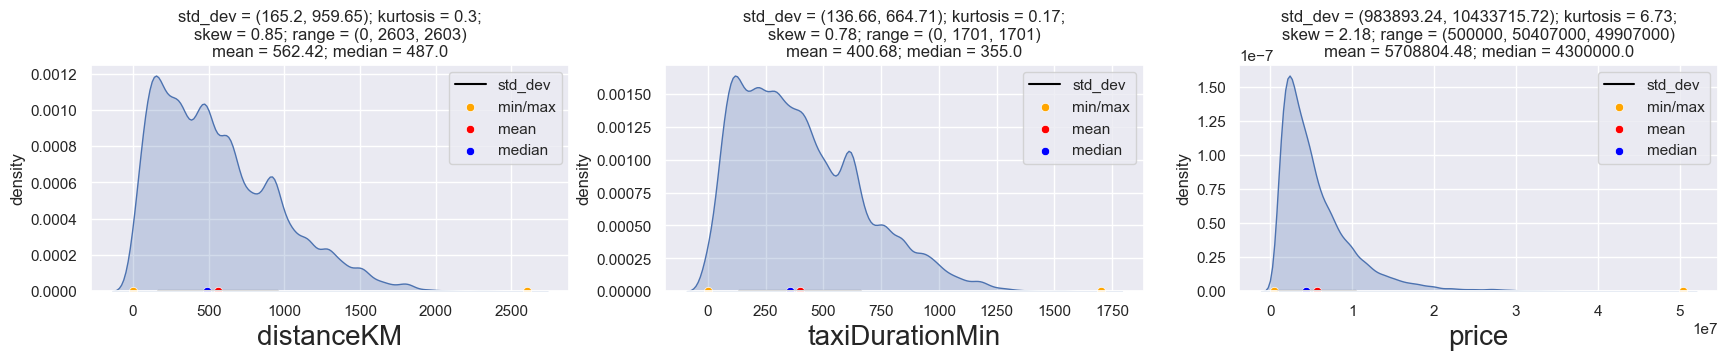

In [28]:
UVA_numeric(df, integer_values)

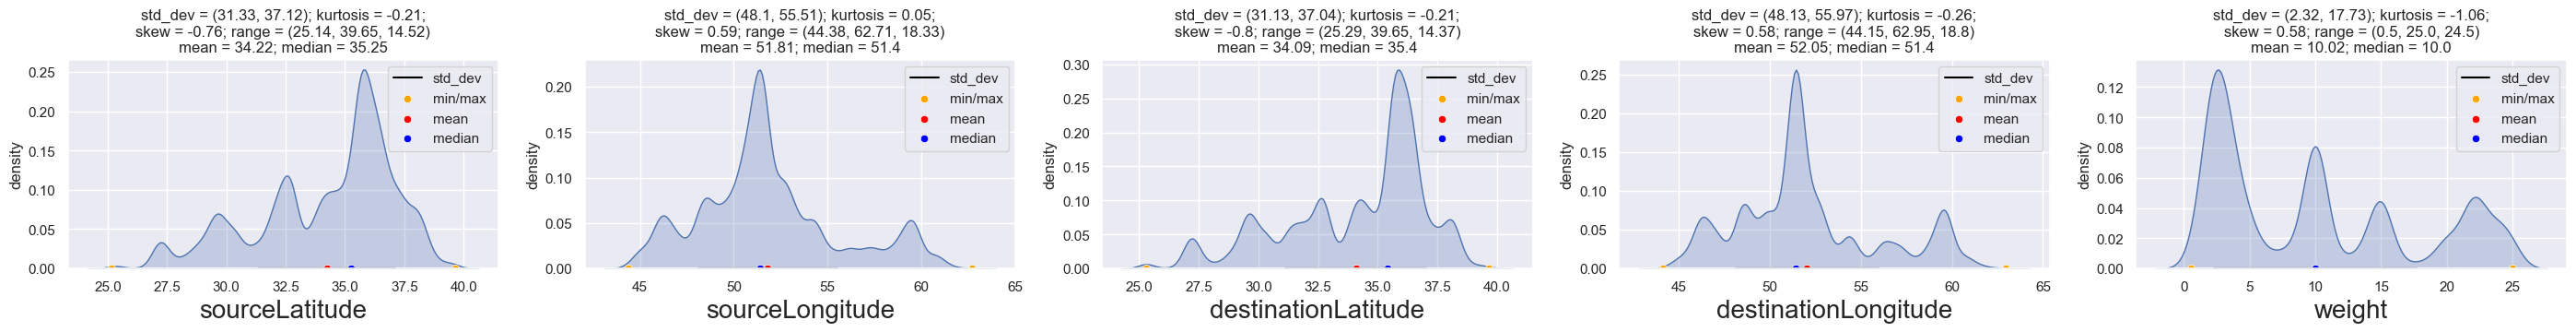

In [29]:
UVA_numeric(df, Float_values)

In [30]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

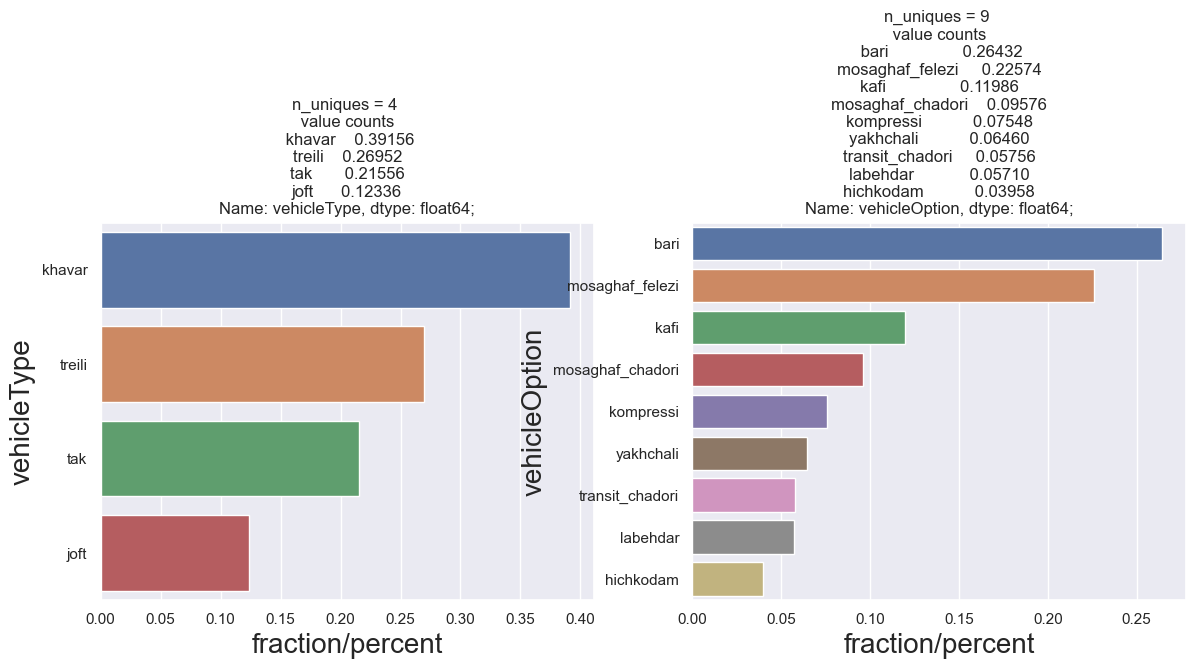

In [36]:
UVA_category(df, Object_values)

In [37]:
#lets analyze outliers
# Outliers detection 
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True


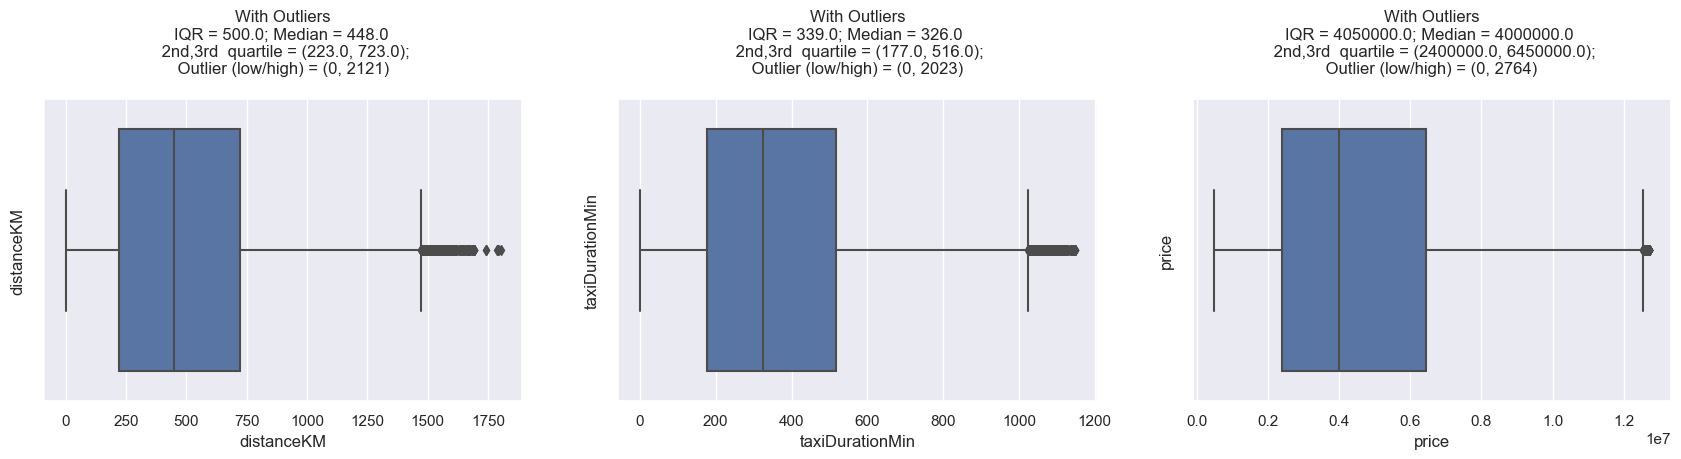

In [71]:
UVA_outlier(df, integer_values,)

<AxesSubplot:xlabel='price', ylabel='Count'>

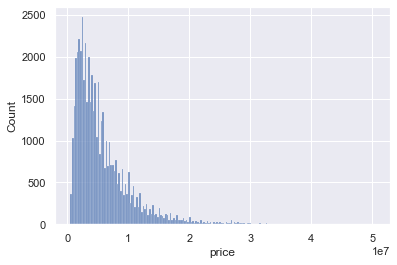

In [42]:
sns.histplot(df['price'])

In [68]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data =df['price']
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
age = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(age))

Identified outliers: 2670
Non-outlier observations: 46043


In [69]:
print("Maximum Upper bound in AGE is", max(age))
print("Minimum Upper bound in AGE is", min(age))

Maximum Upper bound in AGE is 12716000
Minimum Upper bound in AGE is 500000


In [53]:
print("Maximum Upper bound in AGE is", max(age))
print("Minimum Upper bound in AGE is", min(age))

Maximum Upper bound in AGE is 1647
Minimum Upper bound in AGE is 0


In [70]:
# lets remove outliers 
df.drop(df[df['price'] > 12716000].index, inplace = True)
df.drop(df[df['price'] < 500000].index, inplace = True)
# lets remove outliers 

In [55]:
# lets remove outliers 
df.drop(df[df['taxiDurationMin'] > 1667].index, inplace = True)
df.drop(df[df['taxiDurationMin'] < 0].index, inplace = True)
# lets remove outliers 

In [73]:
df.drop('date',inplace=True,axis=1)
df.drop('distance_New',inplace=True,axis=1)
df.drop('distance_miles',inplace=True,axis=1)

In [78]:
new=pd.get_dummies(df, prefix=['vehicleType', 'vehicleOption'])

In [79]:
df.head()

sourceLatitude  sourceLongitude  destinationLatitude  destinationLongitude  \
0       32.692973        51.534325            35.719600             50.360540   
1       39.024777        47.727311            37.794447             48.898530   
2       34.644159        50.875606            36.652243             51.490208   
3       32.621658        51.560335            36.469973             52.343745   
4       37.837692        46.828924            35.697815             51.396750   

   distanceKM  taxiDurationMin vehicleType     vehicleOption  weight    price  
0         409              287         tak              bari    10.0  4860000  
1         320              314         tak              bari    10.0  2700000  
2         346              329        joft         kompressi    13.6  4000000  
3         626              472      khavar   mosaghaf_felezi     4.0  4500000  
4         576              366      khavar  mosaghaf_chadori     2.0  2700000

In [80]:
new.head()

sourceLatitude  sourceLongitude  destinationLatitude  destinationLongitude  \
0       32.692973        51.534325            35.719600             50.360540   
1       39.024777        47.727311            37.794447             48.898530   
2       34.644159        50.875606            36.652243             51.490208   
3       32.621658        51.560335            36.469973             52.343745   
4       37.837692        46.828924            35.697815             51.396750   

   distanceKM  taxiDurationMin  weight    price  vehicleType_joft  \
0         409              287    10.0  4860000                 0   
1         320              314    10.0  2700000                 0   
2         346              329    13.6  4000000                 1   
3         626              472     4.0  4500000                 0   
4         576              366     2.0  2700000                 0   

   vehicleType_khavar  vehicleType_tak  vehicleType_treili  \
0                   0                1                   0   
1                   0                1                   0   
2                   0                0                   0   
3                   1                0                   0   
4                   1                0                   0   

   vehicleOption_bari  vehicleOption_hichkodam  vehicleOption_kafi  \
0                   1                        0                   0   
1                   1                        0                   0   
2                   0                        0                   0   
3                   0                        0                   0   
4                   0                        0                   0   

   vehicleOption_kompressi  vehicleOption_labehdar  \
0                        0                       0   
1                        0                       0   
2                        1                       0   
3                        0                       0   
4                        0                       0   

   vehicleOption_mosaghaf_chadori  vehicleOption_mosaghaf_felezi  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              1   
4                               1                              0   

   vehicleOption_transit_chadori  vehicleOption_yakhchali  
0                              0                        0  
1                              0                        0  
2                              0                        0  
3                              0                        0  
4                              0                        0

In [81]:
new.shape

(46043, 21)

In [84]:
print("List of Object values",list(new.select_dtypes(['object']).columns))

List of Object values []


In [85]:
#Model Building 

In [181]:
# base line model
X = new.drop(['price'],axis=1)
y = new['price']
X.shape

(46043, 20)

In [170]:
X.head()

weight  vehicleType_joft  vehicleType_khavar  vehicleType_tak  \
0    10.0                 0                   0                1   
1    10.0                 0                   0                1   
2    13.6                 1                   0                0   
3     4.0                 0                   1                0   
4     2.0                 0                   1                0   

   vehicleType_treili  vehicleOption_bari  vehicleOption_hichkodam  \
0                   0                   1                        0   
1                   0                   1                        0   
2                   0                   0                        0   
3                   0                   0                        0   
4                   0                   0                        0   

   vehicleOption_kafi  vehicleOption_kompressi  vehicleOption_labehdar  \
0                   0                        0                       0   
1                   0                        0                       0   
2                   0                        1                       0   
3                   0                        0                       0   
4                   0                        0                       0   

   vehicleOption_mosaghaf_chadori  vehicleOption_mosaghaf_felezi  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              1   
4                               1                              0   

   vehicleOption_transit_chadori  vehicleOption_yakhchali  
0                              0                        0  
1                              0                        0  
2                              0                        0  
3                              0                        0  
4                              0                        0

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [173]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [174]:
# Creating instance of Linear Regresssion
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
lr = LR()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [175]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 1742664.5397943917


In [176]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(X_test)
k = mae(test_predict, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     1729040.2119435396


In [177]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test,test_predict))

2209464.2096565412

In [178]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_predict, y_test)

0.39883345339327714

In [150]:
# Normalized data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [179]:
print("Linear Regression",lr.score(X_train, y_train))

Linear Regression 0.3975064853507816


In [180]:
print("Linear Regression",lr.score(X_test, y_test))

Linear Regression 0.4088250131058835


In [133]:
df.corr()['price'].sort_values()

destinationLatitude    -0.108732
sourceLatitude         -0.019853
sourceLongitude         0.017689
destinationLongitude    0.059896
weight                  0.541820
distanceKM              0.621684
taxiDurationMin         0.625689
price                   1.000000
Name: price, dtype: float64

In [134]:
lr.coef_

array([-2.57203177e+02,  7.63383174e+03,  5.26166404e+04,  4.55097316e+05,
       -1.58330661e+06, -4.69832357e+05,  1.59804165e+06,  3.30449168e+04,
        3.64750231e+05,  2.59217500e+04, -1.04959507e+06, -4.97961557e+04,
        4.56616164e+04, -1.44987055e+05,  7.06371840e+05,  6.86279254e+04])

In [135]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

In [142]:
#Model 1 - Decision Tree
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(random_state= 101)
M1_train, M1_test = model_predictions(DT, X_train, y_train, X_test)

In [145]:
#Model 2 - Logistic Regression
from sklearn.linear_model import LinearRegression as Lt
LR=Lt()
M2_train, M2_test = model_predictions(LR, X_train, y_train, X_test)

In [146]:
from sklearn import datasets, ensemble
xg = ensemble.GradientBoostingRegressor()
M3_train, M3_test = model_predictions(xg, X_train, y_train, X_test)

In [147]:
#Creating a New train dataframe
train_prediction = {
              'DT': M1_train,
              'LR': M2_train,
              'xg': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

DT            LR            xg
0  5000000.0  4.649720e+06  4.611322e+06
1  1400000.0  1.858216e+06  2.189261e+06
2  4700000.0  4.871991e+06  4.969549e+06
3  2714000.0  1.853485e+06  2.189261e+06
4  8117000.0  7.486710e+06  7.953753e+06

In [148]:
#Creating a New test dataframe
test_prediction = {
              'DT': M1_test,
              'LR': M2_test,
              'Xg': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

DT            LR            Xg
0  2.333333e+06  2.725736e+06  2.728456e+06
1  1.007000e+07  7.304174e+06  7.839784e+06
2  3.200000e+06  4.938790e+06  4.795549e+06
3  8.640000e+06  6.295783e+06  5.963923e+06
4  1.624844e+06  2.031982e+06  1.767977e+06

In [185]:
# Stacker Model
model = DecisionTreeRegressor(random_state= 101)
model.fit(train_predictions, y_train)
model.score(test_predictions,y_test)

0.6704294403772552

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
reg1 = RandomForestRegressor(max_depth=10,max_leaf_nodes=20)

In [190]:
reg1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=20)

In [192]:
# Predicting over the Train Set and calculating error
train_predict112 = reg1.predict(X_train)
k11 = mae(train_predict112, y_train)
print('Training Mean Absolute Error', k11 )

Training Mean Absolute Error 1722593.980902326


In [193]:
# Predicting over the Test Set and calculating error
test_predict111 = reg1.predict(X_test)
k12 = mae(test_predict111, y_test)
print('Test Mean Absolute Error    ', k12 )

Test Mean Absolute Error     1705968.3247812993


In [194]:
np.sqrt(mean_squared_error(y_test,test_predict111))

2189848.6645416506

In [195]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_predict111, y_test)

0.38258079321286076

In [196]:
print("Random Forest",reg1.score(X_train, y_train))

Random Forest 0.4077576566298299


In [197]:
print("RF test score",reg1.score(X_test, y_test))

RF test score 0.4192752789774835


In [198]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [199]:
# Predicting over the Train Set and calculating error
train_predict12 = reg.predict(X_train)
k111 = mae(train_predict12, y_train)
print('Training Mean Absolute Error', k111)


Training Mean Absolute Error 1716293.6561812258


In [200]:
# Predicting over the Test Set and calculating error
test_predict13 = reg.predict(X_test)
k122 = mae(test_predict13, y_test)
print('Test Mean Absolute Error    ', k122 )

Test Mean Absolute Error     1702608.3866460468


In [201]:
print("XG Boost",reg.score(X_train, y_train))

XG Boost 0.41259030612135983


In [202]:
df.head()

sourceLatitude  sourceLongitude  destinationLatitude  destinationLongitude  \
0       32.692973        51.534325            35.719600             50.360540   
1       39.024777        47.727311            37.794447             48.898530   
2       34.644159        50.875606            36.652243             51.490208   
3       32.621658        51.560335            36.469973             52.343745   
4       37.837692        46.828924            35.697815             51.396750   

   distanceKM  taxiDurationMin vehicleType     vehicleOption  weight    price  
0         409              287         tak              bari    10.0  4860000  
1         320              314         tak              bari    10.0  2700000  
2         346              329        joft         kompressi    13.6  4000000  
3         626              472      khavar   mosaghaf_felezi     4.0  4500000  
4         576              366      khavar  mosaghaf_chadori     2.0  2700000

In [ ]:
reg.predict([32.692973,51.534325,35.719600,50.360540,409,280,])

In [203]:
df.describe()

sourceLatitude  sourceLongitude  destinationLatitude  \
count    46043.000000     46043.000000         46043.000000   
mean        34.387514        51.734323            34.140814   
std          2.717976         3.640360             2.882886   
min         25.140808        44.380824            25.286392   
25%         32.666190        49.588612            32.323488   
50%         35.308981        51.401173            35.462423   
75%         36.293199        53.130000            36.283788   
max         39.652502        62.714383            39.653104   

       destinationLongitude    distanceKM  taxiDurationMin        weight  \
count          46043.000000  46043.000000     46043.000000  46043.000000   
mean              51.968694    508.483092       364.652325      9.306802   
std                3.833636    350.565425       233.637863      7.381946   
min               44.147587      0.000000         0.000000      0.500000   
25%               49.685573    223.000000       177.000000      3.000000   
50%               51.404607    448.000000       326.000000      8.000000   
75%               53.212054    723.000000       516.000000     15.000000   
max               62.722546   1802.000000      1148.000000     25.000000   

              price  
count  4.604300e+04  
mean   4.670727e+06  
std    2.859971e+06  
min    5.000000e+05  
25%    2.400000e+06  
50%    4.000000e+06  
75%    6.450000e+06  
max    1.271600e+07

In [205]:
df.to_csv('uber1.csv',index=False)